In [25]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

# Credenciales db
host = 'localhost'
database = 'DB_SQM-SALAR'
username = 'postgres'  
password = '1234' 

# Crea la coneccion
conn = psycopg2.connect(
    host=host,
    database=database,
    user=username,
    password=password
)

engine = create_engine('postgresql://'+username+':'+password+'@'+host+'/'+database)
table_name1 = 'SQM-Concentraciones_NEW'
table_name2 = 'SQM-Infraestructuras'


df_concentraciones = pd.read_sql_table(table_name1, con=engine)#Trae la tabla de la bda un dataframe
df_infraestructuras = pd.read_sql_table(table_name2, con=engine)#

In [38]:
df_concentraciones.info

<bound method DataFrame.info of        Nombre Infraestructura Alias Infraestructura    Campanna  \
0                    P-17 SDC                  None   SC_1_2018   
1                    P-15 SDC                  None   SC_1_2018   
2                   P-23B SDC                  None   SC_1_2018   
3                     P-6 SDC                  None   SC_1_2018   
4                    P-17 SDC                  None   SC_2_2018   
...                       ...                   ...         ...   
446400                P-6 SDC                  None  SC_04_2018   
446401               P-17 SDC                  None  SC_05_2018   
446402               P-15 SDC                  None  SC_05_2018   
446403                P-6 SDC                  None  SC_05_2018   
446404               Mullay-1                  None     10_2011   

                        Nombre Muestra  Coordenada Utm Este  \
0        P-17 SDC|43129|Laboratorio SC         3.710157e+11   
1        P-15 SDC|43129|Laboratorio S

UNIR LOS DATAFRAME

In [63]:
import pandas as pd

# Asumiendo que df_concentraciones y df_infraestructuras ya están definidos
df_combined = pd.merge(df_concentraciones, df_infraestructuras, 
                       left_on='Nombre Infraestructura', 
                       right_on='HOLEID', 
                       how='inner')  # Cambiar a 'left' para asegurar un left join



In [64]:
df_combined

,Nombre Infraestructura,Alias Infraestructura,Campanna,Nombre Muestra,Coordenada Utm Este,Coordenada Utm Norte,Fecha Muestra,Id Analisis Quimico,Id Calidad,Tipoanalisis,...,TIENE_DATO_ESTRATI,SISTEMA,Alias,geometry,Latitud,Longitud,Activacion,Indicador,Sistema2,Object_ID
0,Mullay-1,None,4_2018,MULLAY-1|26-04-2018|PSAH|SGS,5.999190e+07,7.422645e+08,2018-04-26 00:00:00,258630,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348
1,CA-2015,None,4_2017,CA-2015 Abril 2017,5.961357e+11,7.396452e+12,2017-04-27 00:00:00,267540,1,Laboratorio,...,NO,HIDROMORFA,None,POINT (596135.7 7396451.89),-23.539394,-68.058167,None,None,SQM,82
2,L7-14,None,SQM / 2015,241|L7-14,5.922865e+11,7.422403e+12,2015-10-01 00:00:00,172745,1,Laboratorio,...,NO,None,None,POINT (592286.51 7422403.41),-23.305227,-68.097465,None,None,None,277
3,1028,None,SQM / 2003,279|1028,5.844330e+11,7.383998e+12,2003-03-22 00:00:00,158642,1,Laboratorio,...,None,Peine,None,POINT (-68.17210151073537 -23.65252654027481),-23.652527,-68.172102,None,None,None,5
4,Mullay-1,None,4_2018,MULLAY-1|26-04-2018|PSAH|SGS,5.999190e+07,7.422645e+08,2018-04-26 00:00:00,258631,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284682,Mullay-1,None,4_2015,MULLAY-1|42121|PSAH,5.999190e+07,7.422645e+08,2015-04-27 00:00:00,261484,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348
284683,Mullay-1,None,4_2015,MULLAY-1|42121|PSAH,5.999190e+07,7.422645e+08,2015-04-27 00:00:00,261485,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348
284684,Mullay-1,None,10_2011,MULLAY-1|40839|PSAH,5.999190e+07,7.422645e+08,2011-10-23 00:00:00,258351,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348
284685,Mullay-1,None,10_2011,MULLAY-1|40839|PSAH,5.999190e+07,7.422645e+08,2011-10-23 00:00:00,258352,1,Laboratorio,...,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM,348


In [65]:
table_name3 = 'SQM-Concentraciones_Pivot'
df_BD_PIVOT = pd.read_sql_table(table_name3, con=engine)#

In [7]:
df_BD_PIVOT

Index(['Object_ID', 'Nombre Infraestructura', 'Nombre Muestra',
       'Fecha Muestra', 'Id Analisis Quimico', 'Tipoanalisis',
       'Nombre Grupo Trabajo', 'Nombre Laboratorio', 'Nombre Origen Agua',
       'Nombre Tipo Muestra',
       ...
       'Zinc_ppm', 'Isotopo 13C_PDB', 'Isotopo 14C_pmC',
       'Isotopo 87Sr/86Sr_s/u', 'Isotopo D_‰', 'Isotopo d11B_‰',
       'Isotopo d18O- H2O_‰', 'Isotopo d18O- SO4_‰', 'Isotopo d34S- SO4_‰',
       'Isotopo d7 Li_‰'],
      dtype='object', length=156)

In [66]:
column_order = [
    'Object_ID', 'Nombre Infraestructura', 'Nombre Muestra',
    'Fecha Muestra', 'Id Analisis Quimico', 'Tipoanalisis',
    'Nombre Grupo Trabajo', 'Nombre Laboratorio', 'Nombre Origen Agua',
    'Nombre Tipo Muestra', 'Id Calidad'
]

# Reorganizamos las columnas según el orden especificado
df_combined1 = df_combined[column_order + [col for col in df_combined.columns if col not in column_order]]

In [67]:
df_combined1

,Object_ID,Nombre Infraestructura,Nombre Muestra,Fecha Muestra,Id Analisis Quimico,Tipoanalisis,Nombre Grupo Trabajo,Nombre Laboratorio,Nombre Origen Agua,Nombre Tipo Muestra,...,TIENE_DATO_QCA,TIENE_DATO_ESTRATI,SISTEMA,Alias,geometry,Latitud,Longitud,Activacion,Indicador,Sistema2
0,348,Mullay-1,MULLAY-1|26-04-2018|PSAH|SGS,2018-04-26 00:00:00,258630,Laboratorio,PSAH,SGS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM
1,82,CA-2015,CA-2015 Abril 2017,2017-04-27 00:00:00,267540,Laboratorio,Ambiental,SGS,None,Rutina,...,SI,NO,HIDROMORFA,None,POINT (596135.7 7396451.89),-23.539394,-68.058167,None,None,SQM
2,277,L7-14,241|L7-14,2015-10-01 00:00:00,172745,Laboratorio,Ambiental,NC,Agua Subterránea,Rutina,...,SI,NO,None,None,POINT (592286.51 7422403.41),-23.305227,-68.097465,None,None,None
3,5,1028,279|1028,2003-03-22 00:00:00,158642,Laboratorio,Ambiental,SALAR,Agua Subterránea,Rutina,...,None,None,Peine,None,POINT (-68.17210151073537 -23.65252654027481),-23.652527,-68.172102,None,None,None
4,348,Mullay-1,MULLAY-1|26-04-2018|PSAH|SGS,2018-04-26 00:00:00,258631,Laboratorio,PSAH,SGS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284682,348,Mullay-1,MULLAY-1|42121|PSAH,2015-04-27 00:00:00,261484,Laboratorio,PSAH,ALS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM
284683,348,Mullay-1,MULLAY-1|42121|PSAH,2015-04-27 00:00:00,261485,Laboratorio,PSAH,ALS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM
284684,348,Mullay-1,MULLAY-1|40839|PSAH,2011-10-23 00:00:00,258351,Laboratorio,PSAH,ALS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM
284685,348,Mullay-1,MULLAY-1|40839|PSAH,2011-10-23 00:00:00,258352,Laboratorio,PSAH,ALS,None,Rutina,...,SI,SI,Soncor,None,POINT (599918.95 7422645.06),-23.302598,-68.022846,None,None,SQM


In [80]:
import numpy as np

df_combined1['Valor Analitico Num'] = df_combined1['Valor Analitico Num'].fillna('Null')
index_columns = [
    'Object_ID', 'Nombre Infraestructura', 'Nombre Muestra',
    'Fecha Muestra', 'Id Analisis Quimico', 'Tipoanalisis',
    'Nombre Grupo Trabajo', 'Nombre Laboratorio', 'Nombre Origen Agua',
    'Nombre Tipo Muestra', 'Id Calidad'
    
]

# Creando la tabla pivotada sin aplicar una función de agregación específica
df_pivot = pd.pivot_table(
    df_combined1,
    index=index_columns,
    columns=['Nombre Analito_Unidad'],
    values='Valor Analitico Num',
    aggfunc='first',  # Utilizamos 'first' para tomar el primer valor disponible
   
).reset_index()


In [81]:
df_pivot

Nombre Analito_Unidad,Object_ID,Nombre Infraestructura,Nombre Muestra,Fecha Muestra,Id Analisis Quimico,Tipoanalisis,Nombre Grupo Trabajo,Nombre Laboratorio,Nombre Origen Agua,Nombre Tipo Muestra,...,TemperaturaConductividad_°C,TemperaturaPh_°C,TemperaturaTerreno_°C,Titanio Disuelto_mg/L,Titanio_mg/L,Vanadio Disuelto_mg/L,Vanadio_mg/L,Zinc Disuelto_mg/L,Zinc_mg/L,pH_pH
0,1,1001,1001 (Balance Iónico)|19-07-2022,2022-07-19 00:00:00,406120,Laboratorio,PSAH Complementario,ALS,Agua Subterránea,Duplicado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1001,1001 (Balance Iónico)|19-07-2022,2022-07-19 00:00:00,406121,Laboratorio,PSAH Complementario,ALS,Agua Subterránea,Duplicado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1001,1001 (Balance Iónico)|19-07-2022,2022-07-19 00:00:00,406122,Laboratorio,PSAH Complementario,ALS,Agua Subterránea,Duplicado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1001,1001 (Balance Iónico)|19-07-2022,2022-07-19 00:00:00,406123,Laboratorio,PSAH Complementario,ALS,Agua Subterránea,Duplicado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1001,1001 (Balance Iónico)|19-07-2022,2022-07-19 00:00:00,406124,Laboratorio,PSAH Complementario,ALS,Agua Subterránea,Duplicado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135261,520,"PE-9, C-112","PE-9, C-112|27-12-2022",2022-12-27 00:00:00,419188,Laboratorio,Ambiental,ALS,Agua Subterránea,Rutina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0025,NaN
135262,520,"PE-9, C-112","PE-9, C-112|27-12-2022",2022-12-27 00:00:00,419207,Terreno,Ambiental,SQM,Agua Subterránea,Rutina,...,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135263,520,"PE-9, C-112","PE-9, C-112|27-12-2022",2022-12-27 00:00:00,419208,Terreno,Ambiental,SQM,Agua Subterránea,Rutina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135264,520,"PE-9, C-112","PE-9, C-112|27-12-2022",2022-12-27 00:00:00,419209,Terreno,Ambiental,SQM,Agua Subterránea,Rutina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Obteniendo todos los valores únicos para 'Nombre Analito_Unidad'
all_possible_values = df_combined1['Valor Analitico Num'].notnull()

# Contando el número de valores únicos
number_of_unique_values = len(all_possible_values)

print("Número de valores únicos en 'Nombre Analito_Unidad':", number_of_unique_values)


Número de valores únicos en 'Nombre Analito_Unidad': 284687


In [85]:


df_pivot.to_sql('SQM-Concentraciones_PIVOT_07_04', engine, index=False, if_exists='replace',)

26

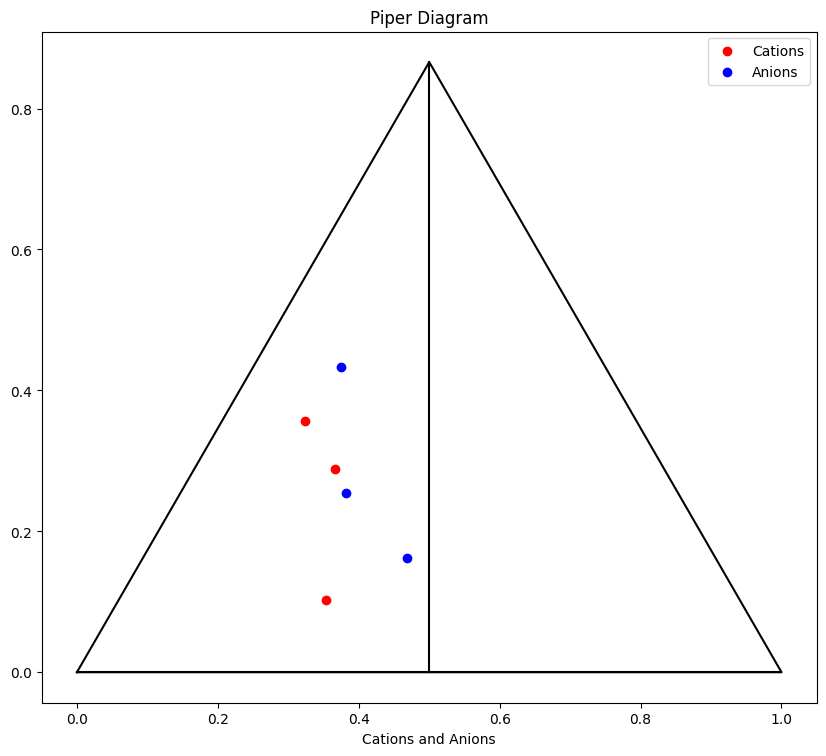

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_piper(cations, anions):
    def trilinear_transform(ca, mg, na_k):
        total = ca + mg + na_k
        x = 0.5 * (2 * mg + na_k) / total
        y = (np.sqrt(3) / 2) * na_k / total
        return x, y

    def transform_to_piper(ca, mg, na_k, cl, so4, hco3_co3):
        cation_x, cation_y = trilinear_transform(ca, mg, na_k)
        anion_x, anion_y = trilinear_transform(cl, so4, hco3_co3)
        
        return cation_x, cation_y, anion_x, anion_y

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')

    ca = np.array([sample['Ca'] for sample in cations])
    mg = np.array([sample['Mg'] for sample in cations])
    na_k = np.array([sample['Na_K'] for sample in cations])

    cl = np.array([sample['Cl'] for sample in anions])
    so4 = np.array([sample['SO4'] for sample in anions])
    hco3_co3 = np.array([sample['HCO3_CO3'] for sample in anions])

    cation_x, cation_y, anion_x, anion_y = transform_to_piper(ca, mg, na_k, cl, so4, hco3_co3)

    ax.scatter(cation_x, cation_y, c='r', label='Cations')
    ax.scatter(anion_x, anion_y, c='b', label='Anions')

    ax.plot([0, 0.5, 1, 0], [0, np.sqrt(3) / 2, 0, 0], 'k-')
    ax.plot([0.5, 0.5], [0, np.sqrt(3) / 2], 'k-')
    ax.plot([0, 1], [0, 0], 'k-')

    ax.legend()
    ax.set_title('Piper Diagram')
    ax.set_xlabel('Cations and Anions')

    plt.show()

# Datos de ejemplo para cationes y aniones
cations = [
    {'Ca': 10, 'Mg': 5, 'Na_K': 2},
    {'Ca': 7, 'Mg': 3, 'Na_K': 5},
    {'Ca': 8, 'Mg': 2, 'Na_K': 7}
]

anions = [
    {'Cl': 8, 'SO4': 4, 'HCO3_CO3': 5},
    {'Cl': 7, 'SO4': 6, 'HCO3_CO3': 3},
    {'Cl': 6, 'SO4': 2, 'HCO3_CO3': 8}
]

plot_piper(cations, anions)

In [1]:
import numpy as np
import plotly.graph_objects as go

def mg_to_meq(concentration, equivalent_weight):
    return concentration / equivalent_weight

weights = {
    'Ca': 20.04,
    'Mg': 12.15,
    'Na': 23.0,
    'K': 39.1,
    'Cl': 35.45,
    'SO4': 48.03,
    'HCO3': 61.02,
    'CO3': 30.0
}

def trilinear_transform(ca, mg, na_k):
    total = ca + mg + na_k
    x = 0.5 * (2 * mg + na_k) / total
    y = (np.sqrt(3) / 2) * na_k / total
    return x, y

def normalize_to_percentage(values):
    total = np.sum(values)
    return 100 * values / total

cation_data = [
    {'Ca': 60, 'Mg': 20, 'Na': 10, 'K': 5},
    {'Ca': 40, 'Mg': 15, 'Na': 20, 'K': 10},
    {'Ca': 50, 'Mg': 25, 'Na': 15, 'K': 8}
]

anion_data = [
    {'Cl': 30, 'SO4': 50, 'HCO3': 70, 'CO3': 5},
    {'Cl': 40, 'SO4': 60, 'HCO3': 50, 'CO3': 10},
    {'Cl': 35, 'SO4': 55, 'HCO3': 65, 'CO3': 8}
]

cation_meq = []
anion_meq = []

for sample in cation_data:
    ca_meq = mg_to_meq(sample['Ca'], weights['Ca'])
    mg_meq = mg_to_meq(sample['Mg'], weights['Mg'])
    na_k_meq = mg_to_meq(sample['Na'], weights['Na']) + mg_to_meq(sample['K'], weights['K'])
    cation_meq.append([ca_meq, mg_meq, na_k_meq])

for sample in anion_data:
    cl_meq = mg_to_meq(sample['Cl'], weights['Cl'])
    so4_meq = mg_to_meq(sample['SO4'], weights['SO4'])
    hco3_co3_meq = mg_to_meq(sample['HCO3'], weights['HCO3']) + mg_to_meq(sample['CO3'], weights['CO3'])
    anion_meq.append([cl_meq, so4_meq, hco3_co3_meq])

cation_x = []
cation_y = []
anion_x = []
anion_y = []

for ca, mg, na_k in cation_meq:
    normalized = normalize_to_percentage([ca, mg, na_k])
    x, y = trilinear_transform(normalized[0], normalized[1], normalized[2])
    cation_x.append(x)
    cation_y.append(y)

for cl, so4, hco3_co3 in anion_meq:
    normalized = normalize_to_percentage([cl, so4, hco3_co3])
    x, y = trilinear_transform(normalized[0], normalized[1], normalized[2])
    anion_x.append(x)
    anion_y.append(y)

fig = go.Figure()

# Cationes
fig.add_trace(go.Scatter(
    x=cation_x, y=cation_y, mode='markers',
    name='Cations', marker=dict(color='red')
))

# Aniones
fig.add_trace(go.Scatter(
    x=anion_x, y=anion_y, mode='markers',
    name='Anions', marker=dict(color='blue')
))

# Triángulos de los cationes y aniones
triangle_x = [0, 0.5, 1, 0]
triangle_y = [0, np.sqrt(3)/2, 0, 0]

fig.add_trace(go.Scatter(
    x=triangle_x, y=triangle_y, mode='lines',
    line=dict(color='black'), showlegend=False
))

fig.add_trace(go.Scatter(
    x=[0.5, 0.5], y=[0, np.sqrt(3)/2], mode='lines',
    line=dict(color='black'), showlegend=False
))

fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 0], mode='lines',
    line=dict(color='black'), showlegend=False
))

fig.update_layout(
    title='Piper Diagram',
    xaxis_title='Cations and Anions',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    showlegend=True
)

fig.show()


In [4]:
import dash
import dash_core_components as dcc
from dash import html
import plotly.express as px
import pandas as pd

# Crear una aplicación Dash
app = dash.Dash(__name__)

# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Grapes"],
    "Amount": [4, 1, 2, 2],
    "City": ["SF", "SF", "SF", "Montreal"]
})

# Crear un gráfico de barras con Plotly Express
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

# Definir el layout de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)
